In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


TOPSIS Result:

        Model  TOPSIS Score  Rank
1  BlenderBot      0.724136     1
0    DialoGPT      0.671138     2
4       GPT-2      0.622072     3
3        BERT      0.526934     4
2          T5      0.407827     5


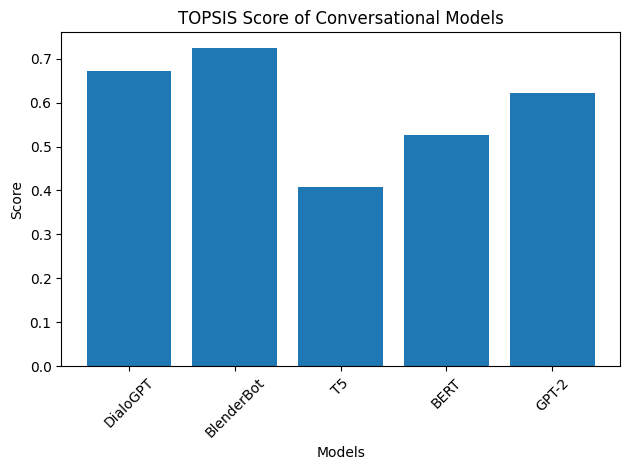

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Load decision matrix
# -----------------------------
data = pd.read_csv("/kaggle/input/datasets/aasthachauhan26/decision-matrix/data.csv")

models = data.iloc[:, 0]
matrix = data.iloc[:, 1:].values

# -----------------------------
# Weights and Impacts
# -----------------------------
weights = np.array([0.30, 0.15, 0.15, 0.15, 0.25])
impact = ['+', '+', '-', '-', '-']  # BLEU, ROUGE benefit; rest cost

# -----------------------------
# Step 1: Normalize
# -----------------------------
norm = matrix / np.sqrt((matrix ** 2).sum(axis=0))

# -----------------------------
# Step 2: Weighted matrix
# -----------------------------
weighted = norm * weights

# -----------------------------
# Step 3: Ideal best & worst
# -----------------------------
ideal_best = []
ideal_worst = []

for i in range(len(impact)):
    if impact[i] == '+':
        ideal_best.append(weighted[:, i].max())
        ideal_worst.append(weighted[:, i].min())
    else:
        ideal_best.append(weighted[:, i].min())
        ideal_worst.append(weighted[:, i].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

# -----------------------------
# Step 4: Distance calculation
# -----------------------------
D_plus = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
D_minus = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))

# -----------------------------
# Step 5: TOPSIS score
# -----------------------------
score = D_minus / (D_plus + D_minus)

# -----------------------------
# Step 6: Ranking (correct way)
# -----------------------------
result = pd.DataFrame({
    "Model": models,
    "TOPSIS Score": score
})

result = result.sort_values(by="TOPSIS Score", ascending=False)
result["Rank"] = range(1, len(result) + 1)

# -----------------------------
# Save result
# -----------------------------
result.to_csv("/kaggle/working/topsis_result.csv", index=False)

print("\nTOPSIS Result:\n")
print(result)

# -----------------------------
# Plot graph (sorted)
# -----------------------------
plt.figure()
plt.bar(models,score)
plt.title("TOPSIS Score of Conversational Models")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/kaggle/working/topsis_graph.png")
plt.show()